<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Андрей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Прогнозирование заказов такси

## Описание проекта

### Описание целей и задач

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

### Описание данных

Данные лежат в файле /datasets/taxi.csv.

Количество заказов находится в столбце 'num_orders' (от англ. number of orders, «число заказов»).

### План работы

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

## Загрузка и ресемплирование данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score

from catboost import CatBoostRegressor

from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
try:
    df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\taxi.csv',index_col = [0], parse_dates=[0])
except FileNotFoundError:
    df = pd.read_csv('/datasets/taxi.csv', index_col = [0],parse_dates=[0])
df.head(25)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

In [3]:
df.sort_index(inplace=True)

<AxesSubplot:xlabel='datetime'>

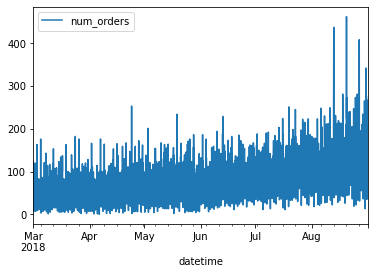

In [4]:
df = df.resample('1H').sum()
df.plot()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, выведен график временного ряда (по часам). Рекомедую наложить на него усредненные данные (например за сутки и неделю), это позволит лучше понять данные.
</div>

## Изучеие данных

Приведены данные с марта по август 2018 года

In [5]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [7]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


<AxesSubplot:xlabel='datetime'>

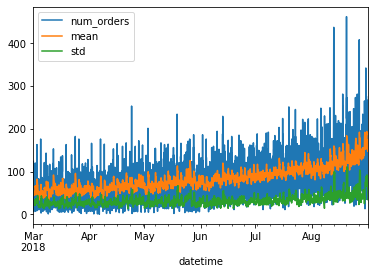

In [8]:
df['mean'] = df['num_orders'].rolling(15).mean()
df['std'] = df['num_orders'].rolling(15).std()
df.plot() 

In [9]:
df.head(20)

,num_orders,mean,std
datetime,,,
2018-03-01 00:00:00,124,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN
2018-03-01 05:00:00,6,NaN,NaN
2018-03-01 06:00:00,12,NaN,NaN
2018-03-01 07:00:00,15,NaN,NaN
2018-03-01 08:00:00,34,NaN,NaN


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты вывел график - ОК. Но что ты на нем увидел? Почему решил оставить в проекте и показать читателю?</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Чтобы показать насколько ряд стационарен? Нужно было комментарий написать?</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Да, лучше дать пояснение как с целями рассмотрения графика так и с тем, что ты на этом графике видишь. Я этот проект знаю "наязусть" и мне твоя логика понятна. Но будет ли она понятна другому читателю?</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Выбран очень неудачное значение для окна скользящего среднего/стандартного отклонения. Причина очень простая - даные ресемплированы по часу, значит нам нужно использовать следующее "круглое" число, но мыслить нужно категориями времени. Это сутки - 24 часа. И если взять сколзящее среднее за сутки, то графики станут гораздо плавнее, т.к. мы очистимся от суточной сезонности. А усреднение за неделю будет еще более плавным.
</div>

<AxesSubplot:xlabel='datetime'>

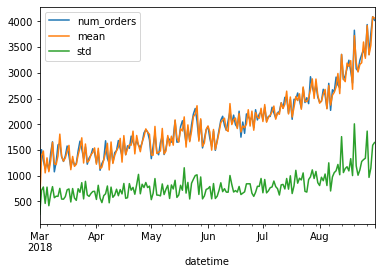

In [10]:
#выведем график суммы заказов в день. Сделаю отдельную таблицу ресесмплированную по дням
df_day = df.resample('1D').sum()
df_day.plot()

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Да, действительно графики стали плавнее, ряд стал менее стационарен. Но по заданию нас просили по часу. Странно получается, на описании проекта не сказали об этом. Поясни, пожалуйста.</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Наша задача - прогнозирование заказов на следующий час. Поэтому ресемплирование за сутки нам не подходит. А мой комментарий выше относился к выбору размера окна для сколзящего среднего. Беря сутки или неделю мы получаем более качественое округление и как следствие можем увидеть тренд более отчетливо. Но на стационарность исходого ряда это никак не влияет, просто мы отчетливее видим тренд.

А для диагностики станционарности кроме "на глазок по графику" на практике исползуются статистические тесты,например Дики-Фулера. 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента[2]:</b> Окей, принято</div>

### Создание новых признаков

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется ты нарушил логику проекта. Вначале мы знакомимся с данными, находим интересные закономерности. И только когда эти закономерности найдены можно приступать к конструированию признаков опираясь на результаты анализа.
    
Поясню - ты создал календарные признаки. Но в данных есть только суточная и недельная сезонности. Поэтому два признака нам очень нужны, а еще два - лишние и от них нужно избавляться.    
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Признак месяца и дня оказались не нужны совсем. Вопрос: принимать решение по добавлению этих признаков нужно после анализа тренда и сезонности? </div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>
 Мое мнение - вначале проводим исследование, а затем на основании исследования начинаем конструировать признаки.
</div>

In [11]:
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df_day['dayofweek'] = df_day.index.dayofweek
df_day['hour'] = df_day.index.hour
df.head()

,num_orders,mean,std,dayofweek,hour
datetime,,,,,
2018-03-01 00:00:00,124,NaN,NaN,3,0
2018-03-01 01:00:00,85,NaN,NaN,3,1
2018-03-01 02:00:00,71,NaN,NaN,3,2
2018-03-01 03:00:00,66,NaN,NaN,3,3
2018-03-01 04:00:00,43,NaN,NaN,3,4


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, из нашего опыта это понятно, хоть мы и не делали отдельное исследование.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарный признак "месяц" нужно удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я вижу, что эти признаки нужны тебе чтобы проанализировать сезонность. Но не стоит изобретать велосипед. В спринте мы изучили инструмент, который нужно обязательно использовать seasonal_decompose. И с помощью этого инструмента очень хорошо находится и сезонность и тренды.
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста построй декомпозицию ряда на сезонность и тренды и продемонстрируй найденную сезонность.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Совсем забыл это сделать.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> ОК </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделал отдельную табличку ресемплирования по дням.</div>

Декомпозиция ряда на сезонность и тренды

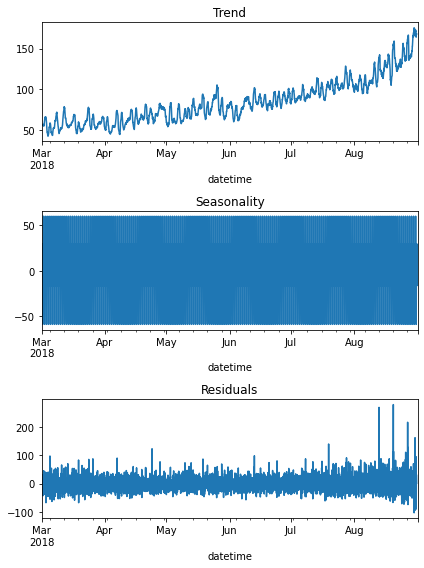

In [12]:
#суточная сезонность
decomposed = seasonal_decompose(df['num_orders'])

plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca()
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())

plt.title('Residuals')
plt.tight_layout()

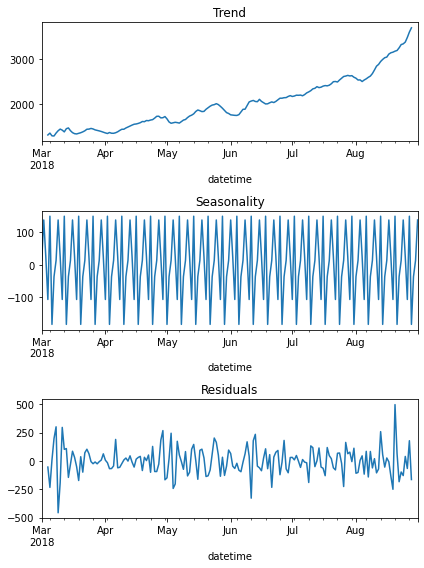

In [13]:
#недельная сезонность
decomposed = seasonal_decompose(df_day['num_orders'])

plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca()
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())

plt.title('Residuals')
plt.tight_layout()

Летом заказов больше, наверное, связано с тем, что люди чаще всего в это время отправляются в отпуск. Остатки необъяснимы. Изучим сезонность

<AxesSubplot:xlabel='datetime'>

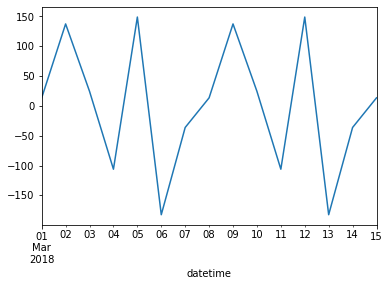

In [14]:
decomposed.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca())

В понедельник заказов меньше всего. Когда на четверг и воскресенье выпадает наибольшее количество заказов

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num_orders  4416 non-null   int64  
 1   mean        4402 non-null   float64
 2   std         4402 non-null   float64
 3   dayofweek   4416 non-null   int64  
 4   hour        4416 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 207.0 KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

### Изучение таблицы весны

In [16]:
#таблица без августа
df_spring = df['2018-03':'2018-05']
df_spring

,num_orders,mean,std,dayofweek,hour
datetime,,,,,
2018-03-01 00:00:00,124,NaN,NaN,3,0
2018-03-01 01:00:00,85,NaN,NaN,3,1
2018-03-01 02:00:00,71,NaN,NaN,3,2
2018-03-01 03:00:00,66,NaN,NaN,3,3
2018-03-01 04:00:00,43,NaN,NaN,3,4
...,...,...,...,...,...
2018-05-31 19:00:00,62,63.733333,26.633670,3,19
2018-05-31 20:00:00,75,65.533333,26.405807,3,20
2018-05-31 21:00:00,107,72.266667,22.767353,3,21


<AxesSubplot:xlabel='datetime'>

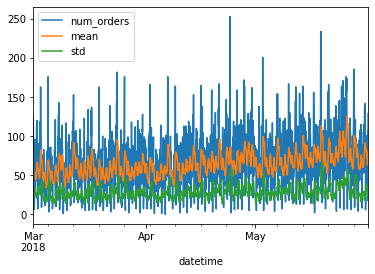

In [17]:
df_spring.loc[:,'num_orders':'std'].plot()

Ряд стационарен, т.к. нет резких скачков среднего значения и стандартного отклонения.

График значений по месяцам виден сверху. Нет смысла изучать данные по дням месяца, но есть смысл по дням недели, а также по часу.

In [18]:
#Создание столбчатой диаграммы
def graf(i,df):
    df[df['dayofweek']==i].groupby(by=['hour']).sum()['num_orders'].plot.bar(figsize=(11,7))
    plt.title('{}'.format(i))
    plt.xlabel('Час')
    plt.ylabel('Количество')
    None

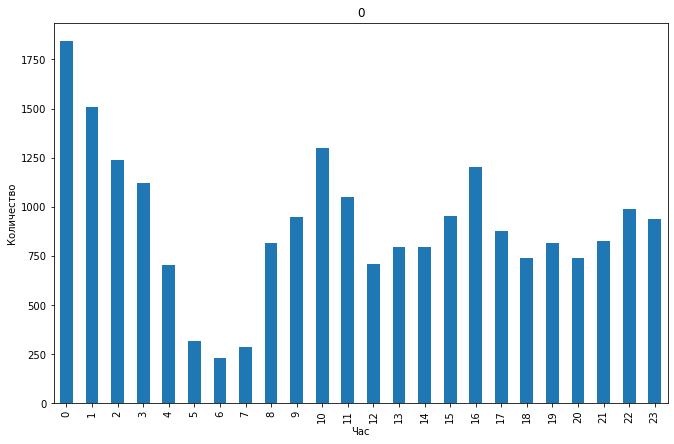

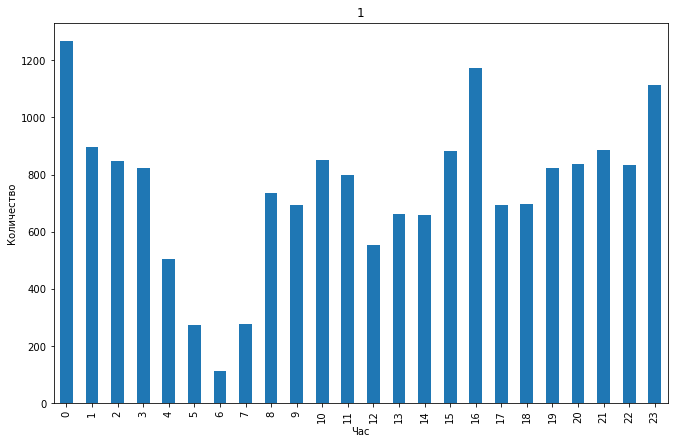

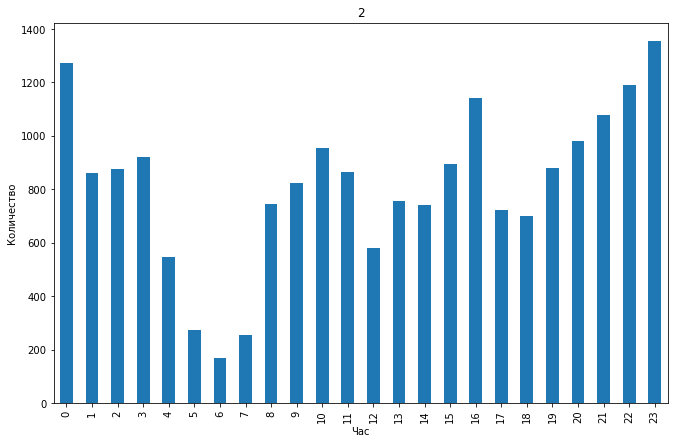

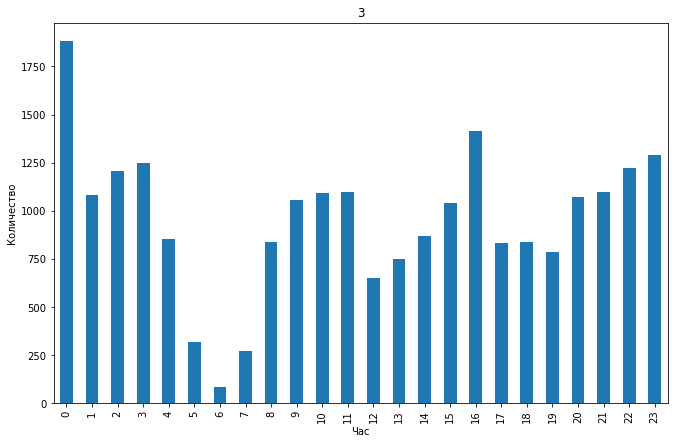

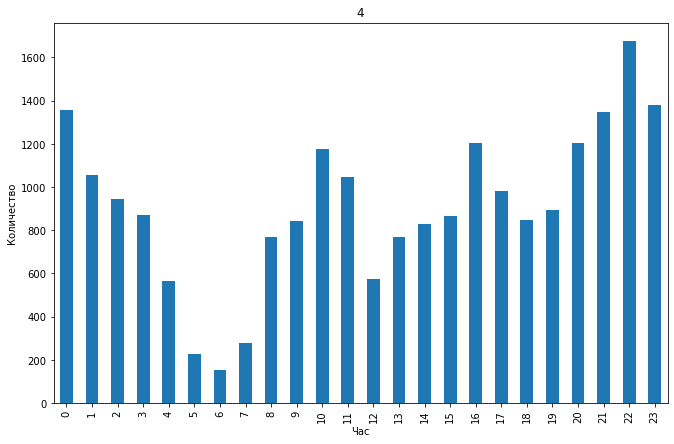

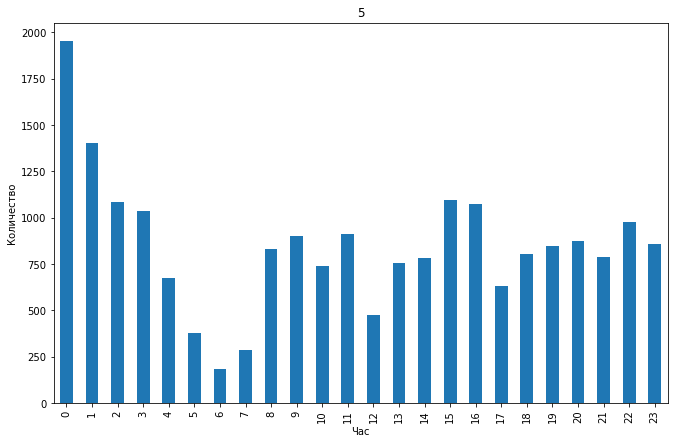

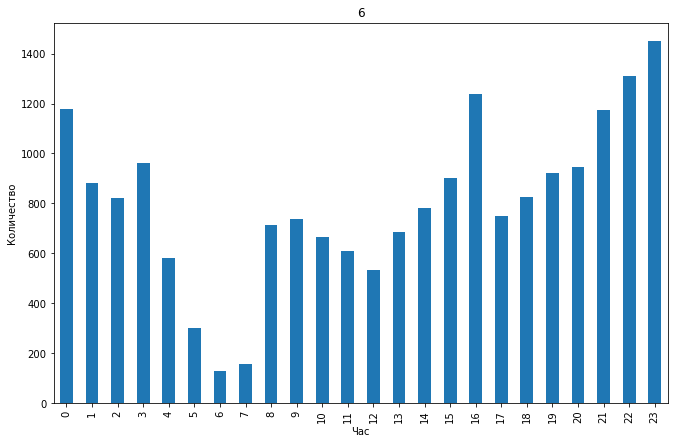

In [19]:
#с понедельника по воскресенье. Понедельник - 0. И тд.
a=df_spring.groupby(by=['dayofweek']).sum()
for i in a.index:
    graf(i,df_spring)
    plt.show() # Это строку лучше закинуть в самый конец функции.

Зависимость от дня недели существует. К примеру, первый час: в понедельник - 1800, вторник и среда - по 1250, четверг - 1850.

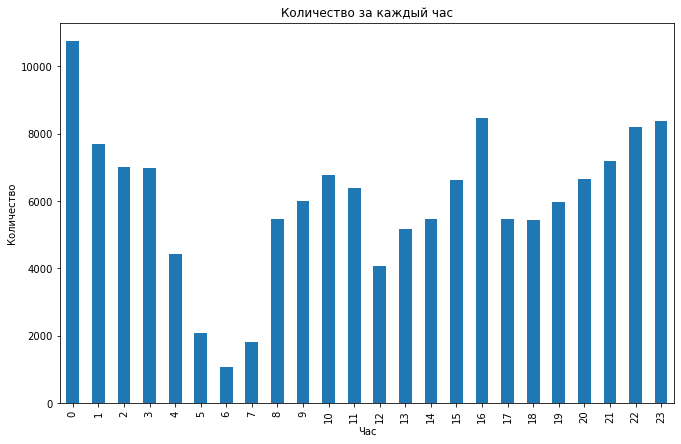

In [20]:
#столбчатая диаграмма без учета дней недели
df_spring.groupby(by=['hour']).sum()['num_orders'].plot.bar(figsize=(11,7))
plt.title('Количество за каждый час')
plt.xlabel('Час')
plt.ylabel('Количество')
None

Без учета дня недели видно, что в первый час наибольшее количество заказаов - 11000. Также со 2го по 4й остается большое кол-во заказов - от 6,5 до 7 тыс. 5й час - 4,5тыс. с 6 по 8 часы кол-ов заказов снижается - с 1 до 2 тыс. С 9го по 16й значения - от 4 до 6,5 тыс. В 17 час количество превышает 8,5 тыс. С 18 часа идет равномерно увеличение заказов от 5 до 8 тыс.

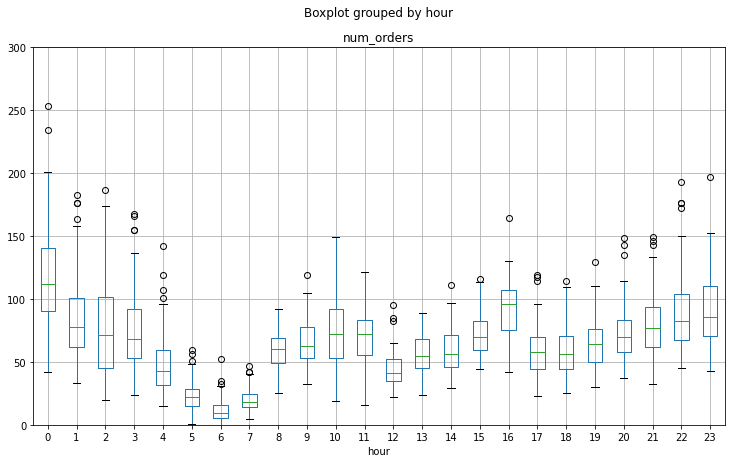

In [21]:
#ящик с усами по часам
df_spring.boxplot('num_orders', by='hour', figsize=(12,7))
plt.ylim(0,300);

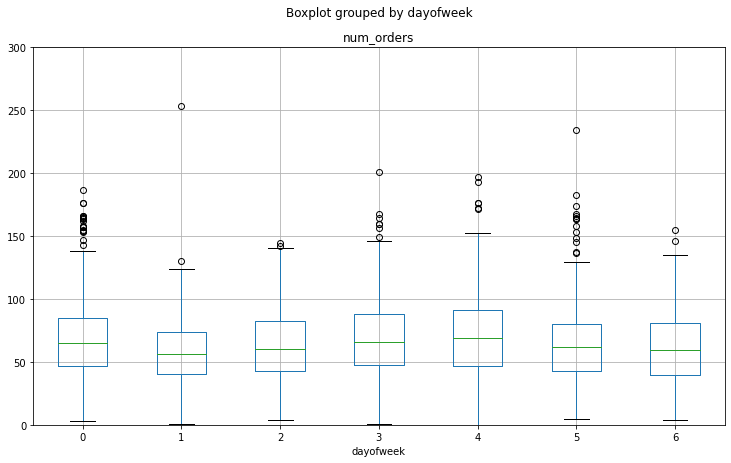

In [22]:
#ящик с усами по дням недели
df_spring.boxplot('num_orders', by='dayofweek', figsize=(12,7))
plt.ylim(0,300);

Больше заказов приходится на Четверг. Наименьшее кол-во заказов - на понедельник. Показатели между днями меняются незначительно.

### Изучение таблицы лета

In [23]:
#таблица августа
df_summer = df['2018-06':'2018-08']

In [24]:
df_summer

,num_orders,mean,std,dayofweek,hour
datetime,,,,,
2018-06-01 00:00:00,118,83.000000,23.697498,4,0
2018-06-01 01:00:00,77,83.266667,23.599233,4,1
2018-06-01 02:00:00,111,84.800000,24.652441,4,2
2018-06-01 03:00:00,132,89.266667,26.786102,4,3
2018-06-01 04:00:00,65,88.933333,27.072566,4,4
...,...,...,...,...,...
2018-08-31 19:00:00,136,147.333333,57.917018,4,19
2018-08-31 20:00:00,154,152.400000,54.650578,4,20
2018-08-31 21:00:00,159,160.666667,43.955605,4,21


<AxesSubplot:xlabel='datetime'>

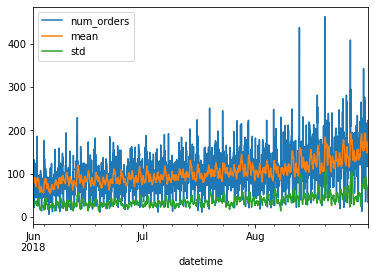

In [25]:
df_summer.loc[:,'num_orders':'std'].plot()

Ряд стационарен, т.к. нет резких скачков среднего значения и стандартного отклонения.

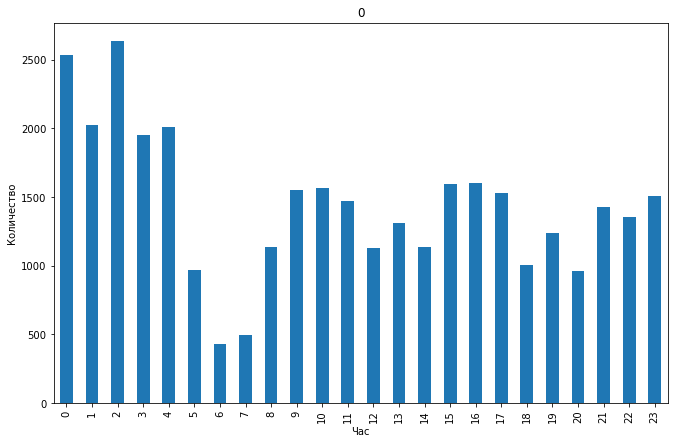

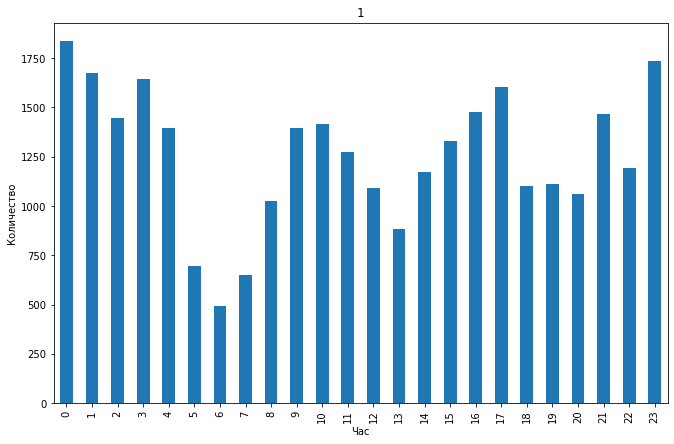

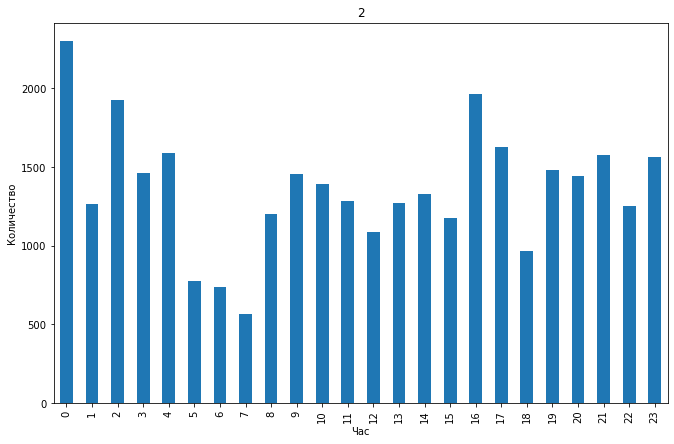

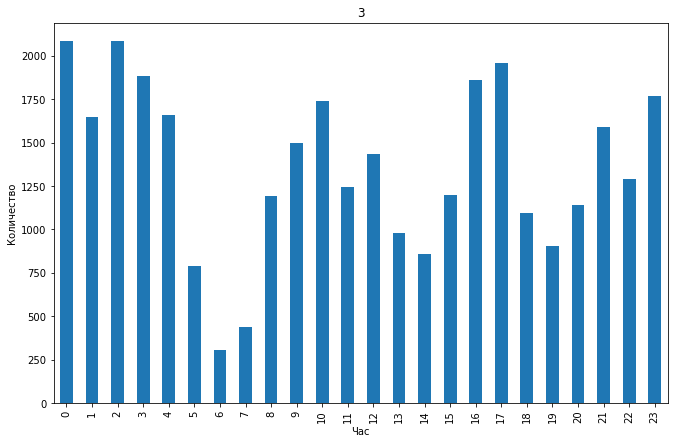

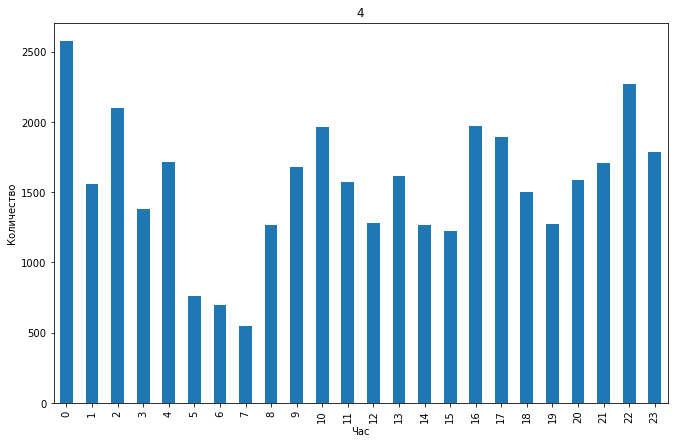

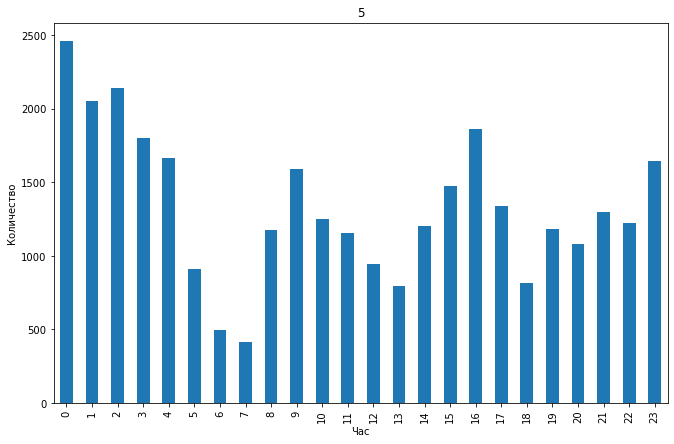

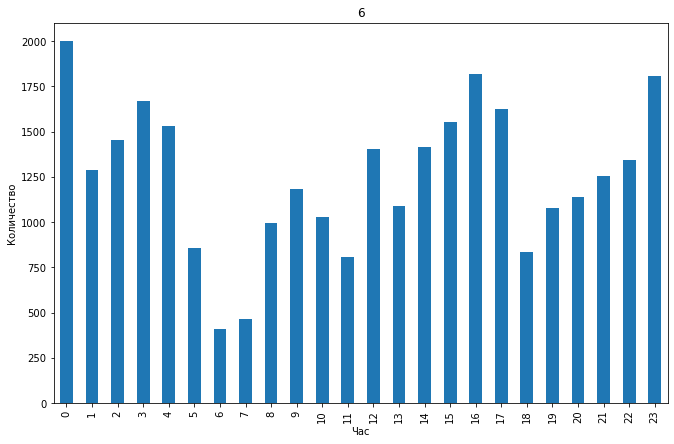

In [26]:
#с понедельника по воскресенье. Понедельник - 0. И тд.
a=df_summer.groupby(by=['dayofweek']).sum()
for i in a.index:
    graf(i,df_summer)
    plt.show() # Это строку лучше закинуть в самый конец функции.

Зависимость от дня недели есть. Например, если посмотреть на значения 1го часа.

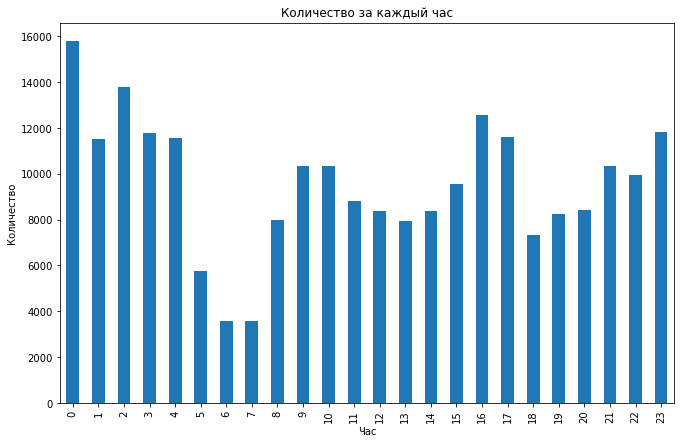

In [27]:
#столбчатая диаграмма без учета дней недели
df_summer.groupby(by=['hour']).sum()['num_orders'].plot.bar(figsize=(11,7))
plt.title('Количество за каждый час')
plt.xlabel('Час')
plt.ylabel('Количество')
None

первые 5 часов значения - от 11000 до 16000. С 6го по 8й часы значения - от 3500 до 6000. С 9го по 16й значения - от 8000 до 11000. 17 и 18, 24й часы значения - около 12000. 19 по 21е часы значения - от 7000 до 8000. 22 и 23 часы - от 10000 до 10500.

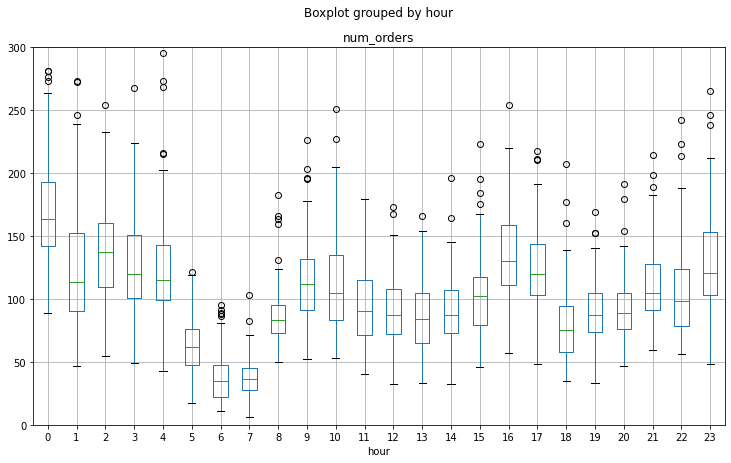

In [28]:
#ящик с усами по часам
df_summer.boxplot('num_orders', by='hour', figsize=(12,7))
plt.ylim(0,300);

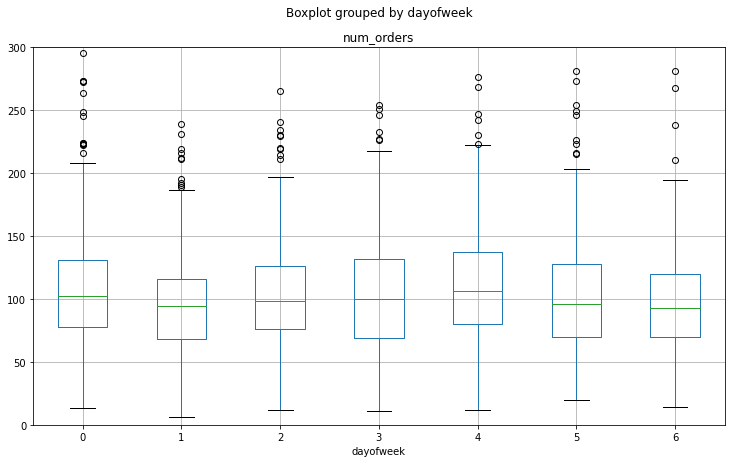

In [29]:
#ящик с усами по дням недели
df_summer.boxplot('num_orders', by='dayofweek', figsize=(12,7))
plt.ylim(0,300);

Летом наибольшие значения в пятницу. Наименьшие - во вторник.

### Вывод

Ряд и летом, и весной стационарны. Зависимость значения по часам от дня недели существует. Наибольшее кол-во заказаов в 1й, 17й, и 24й часы. Наименьшее кол-во заказов с 6го по 8й часы. В понедельник заказов меньше всего. Когда на четверг и воскресенье выпадает наибольшее количество заказов

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Напишите пару слов о моем анализе, пожалуйста.</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

В этом проекте для проведения анализа вполне достаточно исследования на стационарность + декомпозиции на тренды и сезонность (я рекомендую исследовть суточную и недельную сезонности).  Это позволяет нам сделать основные выводы о наличии тренда, суточной и недельной сезонности.

Что касается используемого тобой метода с группировками: ты молодец, что стремишься глубже познакомиться с данными, попробовать скомпоновать иннструменты.  Но простая группировка может сослужить нам плохую службу - т.к. в данных кроме сезонности есть тренд, то применяя просто группировку мы не сможем разделить их и нам будет казаться что в конце периода есть рост (это хорошо заметно если сделать группировку по месяцам).

</div>

## Обучение моделей

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>
    
Пожалуйста добавь в наши данные еще два типа признаков - скользящее среднее и отстающие значения.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>
    
В твоих данных остались признаки "mean" и "std", которые содержат утечку (они сформированы с учетом предсказываемого значения"</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> 'mean' это же и есть скользящее среднее или я что-то путаю? Если оттакливаться от тренажера, то разницы между 'mean' и 'rolling_mean' вроде нет. Возможно я не так понимаю, помогите, пожалуйста. </div>

In [30]:
df = df.drop(['mean','std'],axis=1)

In [31]:
df['rolling_mean'] = df['num_orders'].shift().rolling(168).mean()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v3</b>
    
Эти признаки очень похожи, но не совсем. Давай вспомним, как ты получил признак mean()

    df['mean'] = df['num_orders'].rolling(15).mean()
    
Теперь давай вспомним функцию make_features, которую ты писал в тренажере. Там формирование rolling_mean выглядело вот так
    
     data['rolling_mean'] = data['PJME_MW'].shift().rolling(rolling_mean_size).mean()
    
Отличие в том, что мы добавили сдвиг, благодаря которому при формировании mean() не участвует предсказываемое значение, а только отстающие.
    
   
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента3:</b> Спасибо! </div>

In [32]:
for lag in range(1, 169):
    df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v3</b>
    
Ок, ты добавил признаки. Но почему ты выбрал размер окна 15 а количество отстающих значений 3? Открою секрет - чем большее количество отстающих значений мы используем, тем лучшего качества модели получаются (в среднем) Также очень хорошей практикой является использовать количество отстающих значений совпадающее (или кратное) размеру периода. Т.к. у нас есть суточная и недельная сезонности, то хорошо работают 24 и 168 отстающих значения. Также размер окна 24 или 168. А вот теперь вопрос. Как ты будешь добавлять 168 отстающих значений?
    
Напоминаю, что в тренажере мы писали функцию make_features. Используй её.    
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента3:</b> Вроде понял про значения 24 и 168. Я пытался окна больше 15 сделать, но метрики были хуже. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> Вроде понял. mean и std удалил в признаках. </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил. Когда мы удалили номер месяца и дня, нам стоит не добавлять их в таблицу также? А вдруг обучение по этим признакам понадобится для следующих годов?</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Не стоит усложнять. Универсальных решений нет. Более того, модели машиного обучения имет свойство устаревать, причин множество - изменение в данных, изменения окружающей среды и т.д.  Поэтому через год -два и значимые призаки могут оказаться другими, да и сами данные могут устареть. Ты помнишь, что мы анализируем такси в аэропорт? Произойти может что угодно - COVID и полеты отменяются, просто смена расписания, открытие нового аэроэкспресса.... Поэтому пока используем старую модель, переодически её переобучая, если она начнет "деградировать" то тогда уже и озаботимся поиском причин.</div>

### Разбиение данных

In [33]:
#пропущенные значения изменим на средние значения, объектов удалим немного
df.dropna(inplace=True)

In [34]:
df.head()

,num_orders,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,3,0,54.226190,94.0,127.0,108.0,76.0,50.0,99.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0
2018-03-08 01:00:00,78,3,1,54.339286,143.0,94.0,127.0,108.0,76.0,50.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0
2018-03-08 02:00:00,65,3,2,54.297619,78.0,143.0,94.0,127.0,108.0,76.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0
2018-03-08 03:00:00,68,3,3,54.261905,65.0,78.0,143.0,94.0,127.0,108.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0
2018-03-08 04:00:00,60,3,4,54.273810,68.0,65.0,78.0,143.0,94.0,127.0,...,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0


In [35]:
features = df.drop('num_orders', axis=1)
# извлекём целевой признак
target = df['num_orders']
# отделим 20% данных для валидационной и тестовой выборки в совокупности, остальные 0% - это обучающая выборка 
features_train, features_valid_test, target_train, target_valid_test = \
train_test_split(features,target,shuffle=False,test_size=0.2,random_state=12345)
# отделим теперь  50% для тестовой выборки и 50 % для валидационной выборки из валидационной8 и тестовой выборки в совокупности
features_valid, features_test, target_valid, target_test =\
train_test_split(features_valid_test,target_valid_test,shuffle=False,test_size=0.5,random_state=12345)

In [36]:
features_train

,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,3,0,54.226190,94.0,127.0,108.0,76.0,50.0,99.0,48.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0
2018-03-08 01:00:00,3,1,54.339286,143.0,94.0,127.0,108.0,76.0,50.0,99.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0
2018-03-08 02:00:00,3,2,54.297619,78.0,143.0,94.0,127.0,108.0,76.0,50.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0
2018-03-08 03:00:00,3,3,54.261905,65.0,78.0,143.0,94.0,127.0,108.0,76.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0
2018-03-08 04:00:00,3,4,54.273810,68.0,65.0,78.0,143.0,94.0,127.0,108.0,...,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 09:00:00,4,9,104.595238,89.0,44.0,78.0,64.0,109.0,131.0,161.0,...,108.0,143.0,121.0,67.0,98.0,105.0,92.0,110.0,137.0,137.0
2018-07-27 10:00:00,4,10,104.607143,139.0,89.0,44.0,78.0,64.0,109.0,131.0,...,64.0,108.0,143.0,121.0,67.0,98.0,105.0,92.0,110.0,137.0
2018-07-27 11:00:00,4,11,104.678571,149.0,139.0,89.0,44.0,78.0,64.0,109.0,...,135.0,64.0,108.0,143.0,121.0,67.0,98.0,105.0,92.0,110.0


In [37]:
features_valid

,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168
datetime,,,,,,,,,,,,,,,,,,,,,
2018-07-27 14:00:00,4,14,105.065476,144.0,118.0,110.0,149.0,139.0,89.0,44.0,...,168.0,148.0,115.0,135.0,64.0,108.0,143.0,121.0,67.0,98.0
2018-07-27 15:00:00,4,15,104.845238,61.0,144.0,118.0,110.0,149.0,139.0,89.0,...,148.0,168.0,148.0,115.0,135.0,64.0,108.0,143.0,121.0,67.0
2018-07-27 16:00:00,4,16,105.119048,113.0,61.0,144.0,118.0,110.0,149.0,139.0,...,176.0,148.0,168.0,148.0,115.0,135.0,64.0,108.0,143.0,121.0
2018-07-27 17:00:00,4,17,105.363095,162.0,113.0,61.0,144.0,118.0,110.0,149.0,...,109.0,176.0,148.0,168.0,148.0,115.0,135.0,64.0,108.0,143.0
2018-07-27 18:00:00,4,18,105.464286,160.0,162.0,113.0,61.0,144.0,118.0,110.0,...,171.0,109.0,176.0,148.0,168.0,148.0,115.0,135.0,64.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-14 02:00:00,1,2,115.613095,231.0,139.0,134.0,104.0,160.0,82.0,91.0,...,71.0,99.0,120.0,79.0,44.0,46.0,50.0,108.0,121.0,125.0
2018-08-14 03:00:00,1,3,115.511905,108.0,231.0,139.0,134.0,104.0,160.0,82.0,...,115.0,71.0,99.0,120.0,79.0,44.0,46.0,50.0,108.0,121.0
2018-08-14 04:00:00,1,4,115.922619,190.0,108.0,231.0,139.0,134.0,104.0,160.0,...,100.0,115.0,71.0,99.0,120.0,79.0,44.0,46.0,50.0,108.0


In [38]:
features_test

,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-14 07:00:00,1,7,116.083333,45.0,47.0,139.0,190.0,108.0,231.0,139.0,...,99.0,111.0,74.0,100.0,115.0,71.0,99.0,120.0,79.0,44.0
2018-08-14 08:00:00,1,8,116.142857,54.0,45.0,47.0,139.0,190.0,108.0,231.0,...,101.0,99.0,111.0,74.0,100.0,115.0,71.0,99.0,120.0,79.0
2018-08-14 09:00:00,1,9,116.214286,91.0,54.0,45.0,47.0,139.0,190.0,108.0,...,84.0,101.0,99.0,111.0,74.0,100.0,115.0,71.0,99.0,120.0
2018-08-14 10:00:00,1,10,116.303571,135.0,91.0,54.0,45.0,47.0,139.0,190.0,...,89.0,84.0,101.0,99.0,111.0,74.0,100.0,115.0,71.0,99.0
2018-08-14 11:00:00,1,11,116.636905,155.0,135.0,91.0,54.0,45.0,47.0,139.0,...,87.0,89.0,84.0,101.0,99.0,111.0,74.0,100.0,115.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,4,19,154.297619,207.0,217.0,197.0,116.0,133.0,166.0,136.0,...,196.0,187.0,160.0,246.0,273.0,173.0,242.0,166.0,179.0,113.0
2018-08-31 20:00:00,4,20,154.434524,136.0,207.0,217.0,197.0,116.0,133.0,166.0,...,118.0,196.0,187.0,160.0,246.0,273.0,173.0,242.0,166.0,179.0
2018-08-31 21:00:00,4,21,154.285714,154.0,136.0,207.0,217.0,197.0,116.0,133.0,...,74.0,118.0,196.0,187.0,160.0,246.0,273.0,173.0,242.0,166.0


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>    
Советую просто удалить пропущенные значения... Заполнение средним исказит картину.
</div>

<div class="alert alert-block alert-info">
    <b>Комментарий студента2:</b> Ок.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При разделении на выборки данные не должны перемешиваться (использй shuffle=False).</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую валидационую выборку взять равной тестовой, или использовть кросс-валидацию. Но для корректной кросс-валидации по временным рядам  нужно использовать  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y).</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Про GridSearch понял, но пока нет времени поизучать. Сделал 1 вариант.</div>

### Масштабирование признаков

In [39]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

In [40]:
features_test = scaler.transform(features_test)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### CatBoostRegressor

In [41]:
%%time
#обучение модели
catboost = CatBoostRegressor(random_state=12345)
 
catboost.fit(features_train, target_train, verbose=False)

Wall time: 23.3 s


In [42]:
%%time
#предсказание и оценка модели
predicted = catboost.predict(features_valid)
mse = mean_squared_error(target_valid,predicted)
print(mse ** 0.5)
print(r2_score(target_valid, predicted).round(5))

29.916948832974075
0.58603
Wall time: 9 ms


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Наша целевая метрика - rmse. А ты использовал квадратный корень из mae, как следствие получились слишком низкие значения.</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Да, невнимателен. Спасибо!</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено </div>

In [43]:
#подбор гиперпараметров
for i in range(1,11):
    catboost = CatBoostRegressor(random_state=12345, max_depth=i)
 
    catboost.fit(features_train, target_train, verbose=False)
    predicted = catboost.predict(features_valid)
    mse = mean_squared_error(target_valid,predicted)
    print('при глубине', i)
    print(mse ** 0.5)
    print(r2_score(target_valid, predicted).round(5))

при глубине 1
30.82433917547378
0.56053
при глубине 2
30.5714695386364
0.56771
при глубине 3
30.289868300050113
0.57564
при глубине 4
30.42177335443817
0.57194
при глубине 5
30.257222314827015
0.57656
при глубине 6
29.916948832974075
0.58603
при глубине 7
30.02755716453352
0.58296
при глубине 8
30.266980681125986
0.57628
при глубине 9
30.529583362805557
0.5689
при глубине 10
31.083782209206465
0.5531


RMSE = 28.8.
Эффективность - 60%.
Лучшая модель при  глубине 5.

### Дерево решений

In [44]:
%%time
#обучение модели
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train) 

Wall time: 3.97 s


DecisionTreeClassifier(random_state=12345)

In [45]:
%%time
#предсказание и оценка модели
predicted = model.predict(features_valid)
mse = mean_squared_error(target_valid,predicted)
print(mse ** 0.5)
print(r2_score(target_valid, predicted).round(5))

41.01233673793634
0.22202
Wall time: 4 ms


In [46]:
#подбор гиперпараметров
for i in range(10,50,5):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    mse = mean_squared_error(target_valid,predicted)
    print('при глубине', i)
    print(mse ** 0.5)
    print(r2_score(target_valid, predicted).round(5))

при глубине 10
36.99414898093386
0.367
при глубине 15
39.99955882109643
0.25997
при глубине 20
41.08974396152316
0.21908
при глубине 25
42.17969960565781
0.1771
при глубине 30
41.55280127882652
0.20138
при глубине 35
41.91240164634694
0.1875
при глубине 40
41.00642704288597
0.22225
при глубине 45
40.94926559709192
0.22441


RMSE = 39. Эффективность - 25%. Неэффективная модель.

### LightGBM

In [47]:
%%time
#обучение модели
model = LGBMRegressor(random_state=12345)
model.fit(features_train,target_train)

Wall time: 368 ms


LGBMRegressor(random_state=12345)

In [48]:
%%time
#предсказание и оценка модели
predicted = model.predict(features_valid)
mse = mean_squared_error(target_valid,predicted)
print(mse ** 0.5)
print(r2_score(target_valid, predicted).round(5))

30.138190929834728
0.57988
Wall time: 4.99 ms


In [49]:
#подбор гиперпараметров
trees = [10, 50, 500, 1000, 5000]
for i in trees:
    for j in range(11):
        model = LGBMRegressor(random_state=12345,n_estimators=i, max_depth=j)
        model.fit(features_train,target_train)
        predicted = model.predict(features_valid)
        mse = mean_squared_error(target_valid,predicted)
        print('при глубине', j,'кол-ве деревьев',i)
        print(mse ** 0.5)
        print(r2_score(target_valid, predicted).round(5))

при глубине 0 кол-ве деревьев 10
38.118519577596565
0.32794
при глубине 1 кол-ве деревьев 10
48.33637778635641
-0.08065
при глубине 2 кол-ве деревьев 10
42.52360812199046
0.16363
при глубине 3 кол-ве деревьев 10
41.08691560372604
0.21919
при глубине 4 кол-ве деревьев 10
39.554814607741086
0.27634
при глубине 5 кол-ве деревьев 10
38.65543522814388
0.30887
при глубине 6 кол-ве деревьев 10
38.13746920969284
0.32727
при глубине 7 кол-ве деревьев 10
38.16146808825463
0.32642
при глубине 8 кол-ве деревьев 10
38.21513731454877
0.32452
при глубине 9 кол-ве деревьев 10
38.118519577596565
0.32794
при глубине 10 кол-ве деревьев 10
38.118519577596565
0.32794
при глубине 0 кол-ве деревьев 50
29.765667763398607
0.5902
при глубине 1 кол-ве деревьев 50
34.828237105800994
0.43895
при глубине 2 кол-ве деревьев 50
31.165465535913214
0.55075
при глубине 3 кол-ве деревьев 50
30.959903349445174
0.55666
при глубине 4 кол-ве деревьев 50
30.763923577320163
0.56225
при глубине 5 кол-ве деревьев 50
30.4281974644

RMSE = 29.4
Эффективность - 59%.
Лучшая модель при глубине 8 кол-ве деревьев 500

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Модели обучены корректно (за исключением неправильной метрики) </div>

### Вывод

Модель дерева решений неэффективна. CatBoostRegressor и LightGBM показывают лучшие показатели при определенных гиперпараметрах. LightGBM при глубине 6 и кол-ве деревьев 100 показывает лучшую модель среди всех обученных.

## Финальный тест

In [55]:
%%time
 
model = LGBMRegressor(random_state=12345,n_estimators=500, max_depth=8)
model.fit(features_train,target_train)

Wall time: 1.76 s


LGBMRegressor(max_depth=8, n_estimators=500, random_state=12345)

In [56]:
%%time
predicted = model.predict(features_test)
mse = mean_squared_error(target_test,predicted)
print(mse ** 0.5)
print(r2_score(target_test, predicted).round(5))

44.010210234649534
0.4416
Wall time: 12 ms


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Финальное тестирование производится на тестовой выборке. И пожалуйста используй правильную метрику.</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Да, все исправил. Спасибо!</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

### Вывод

RMSE= 44
Эффективность - 40%.

## Эксперемент-вопрос(для ревьюера)

In [53]:
#добавим месяц и день
df['month'] = df.index.month
df['day'] = df.index.day
features = df.drop('num_orders', axis=1)
# извлекём целевой признак
target = df['num_orders']
# отделим 20% данных для валидационной и тестовой выборки в совокупности, остальные 0% - это обучающая выборка 
features_train, features_valid_test, target_train, target_valid_test = \
train_test_split(features,target,shuffle=False,test_size=0.2,random_state=12345)
# отделим теперь  50% для тестовой выборки и 50 % для валидационной выборки из валидационной8 и тестовой выборки в совокупности
features_valid, features_test, target_valid, target_test =\
train_test_split(features_valid_test,target_valid_test,shuffle=False,test_size=0.5,random_state=12345)
features_train = features_train.fillna(features_train.mean())
features_valid = features_valid.fillna(features_valid.mean())
features_test = features_test.fillna(features_test.mean())
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

In [54]:
#подбор гиперпараметров
trees = [10, 50, 100, 500, 1000, 5000]
for i in trees:
    for j in range(11):
        model = LGBMRegressor(random_state=12345,n_estimators=i, max_depth=j)
        model.fit(features_train,target_train)
        predicted = model.predict(features_valid)
        mse = mean_squared_error(target_valid,predicted)
        print('при глубине', j,'кол-ве деревьев',i)
        print(mse ** 0.5)
        print(r2_score(target_valid, predicted).round(5))

при глубине 0 кол-ве деревьев 10
38.08740589561348
0.32903
при глубине 1 кол-ве деревьев 10
48.33637778635641
-0.08065
при глубине 2 кол-ве деревьев 10
42.52360812199046
0.16363
при глубине 3 кол-ве деревьев 10
41.08691560372604
0.21919
при глубине 4 кол-ве деревьев 10
39.41164546526821
0.28156
при глубине 5 кол-ве деревьев 10
38.656708512330006
0.30882
при глубине 6 кол-ве деревьев 10
38.14238914385637
0.32709
при глубине 7 кол-ве деревьев 10
38.05447411670716
0.33019
при глубине 8 кол-ве деревьев 10
38.319571063996264
0.32083
при глубине 9 кол-ве деревьев 10
38.08740589561348
0.32903
при глубине 10 кол-ве деревьев 10
38.08740589561348
0.32903
при глубине 0 кол-ве деревьев 50
29.81634168333802
0.58881
при глубине 1 кол-ве деревьев 50
34.828237105800994
0.43895
при глубине 2 кол-ве деревьев 50
31.356669225525437
0.54522
при глубине 3 кол-ве деревьев 50
30.517259486629715
0.56925
при глубине 4 кол-ве деревьев 50
30.77590575321124
0.56191
при глубине 5 кол-ве деревьев 50
30.2796703579086

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Почему при добавлении месяца и дня модель показывает меньше rmse и больше эффективности, в сравнении без добавления? Как узнать, что добавление месяца и дня - это ошибка(или вовсе не ошибка, ведь больше данных, значит больше эффективности?), смотреть на другие метрики?</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Потому что ты не использовал отстающие значения и скользящее окно и модели явно не хватает данных. А при наличии восходящего тренда модели настраиваются на признак месяц как вносящий вклад в рост.Но мы не знаем, будет ли этот рост продолжаться.

Волшебного рецепта, как сфорировать правильные признаки нет. Мы делаем анализ, думаем, рассуждаем.  Не всегда больше значит лучше. Модели ищут взаимосвязи между признаками, которые мы даем и ответами. Данных о взаимосвязи между месяцем и предсказанием модели за следуюий час просто недостаточно - каждый месяц в данных всего один раз. 

    
Ты молодец, что глубоко копаешь, тогда важно понимать, что подход, который мы рассмотрели в спринте - далеко не единственный, который применяется для анализа временных рядов. Это очень "старая" задача и подходов придумали очень много - от авторегрессионных моделей дло  рекурентных нейронных сетей и трансформеров. Наш подход - лишь один из возможных.    
</div>

## Общий вывод

Ряд и летом, и весной стационарны. В августе количество заказов возрастает. Зависимость значения по часам от дня недели существует. Наибольшее кол-во заказаов в 1й, 17й, и 24й часы. Наименьшее кол-во заказов с 6го по 8й часы. В понедельник заказов меньше всего. Когда на четверг и воскресенье выпадает наибольшее количество заказов

LightGBM - эффективная модель, которая на тестовых данных показывает:
* RMSE = 45.2
* Эффективность - 40%.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Привет. Твоя работа показалась мне интересной, но с ней нужно еще хорошо поработать.
    
Во первых я советую тебе внести корректировки в EDA. Оставлять ли блок с самоятоятельным поиском сезонности - на твое усмотрение (хотя не советую изобретать велосипед), но пожалуйста обязательно исследуй сезонность с помощью seasonal_decompose.
    
Что нужно доработать обязательно (красные комментарии)
    
  - удалить календарный признак месяц
  - нужно использовать все типы признаков (календарные, отстающие значения, скользящее окно)
  - при разделении на выборки даные не должны перемешиваться (это специфика временых рядов)
  - пожалуйста, используй правильную метрику (rmse)
  - тестирование мы проводим на тестовой выборке  
 
    
Желтые комментарии на твое усмотрение.
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет. Нужно еще немного поработать с признаками:

 - К календарным признакам добавить отстающие признаки и скользящее среднее (есши забыл - можешь посмотреть в тренажере)
 - нужно удалить признаки mean и std, содержащие утечку.
    
Позволь сразу дам совет. Когда будешь выбирать размер окна / количство отстающих значений попробуй выбирать из из чисел 24 и 168. Это найденная в данных сезонность (сутки и неделя). По опыту скажу, что чем значение больше, тем качество моделей выше.   

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента[2]:</b> Постарался исправить, правда, не совсем точно понял про скользящее среднее. Спасибо!</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

Вот со скользящим средним как раз проблемы и возникают (утечка). Постарался объяснить. Пожалуйста исправь.
</div>